# **loading libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import shapiro,skew

from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import mutual_info_regression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import ExtraTreesRegressor


pd.set_option('display.max_columns',None)

import warnings
warnings.filterwarnings('ignore')

In [2]:
# from google.colab import files
# files.upload()

# !mkdir -p ~/.kaggle
# !mv kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

# !kaggle datasets download -d shree1992/housedata

# !mkdir -p /content/housedata
# !unzip -q housedata.zip -d /content/housedata

# !ls /content/housedata

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/housedata/output.csv
/kaggle/input/housedata/data.csv
/kaggle/input/housedata/data.dat


In [3]:
df = pd.read_csv('/kaggle/input/housedata/data.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


# **Data Exploration**

In [4]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [6]:
df['price'] = (df['price']).astype(int)
df['floors'] = (df['floors']).astype(int)
df['bedrooms'] = (df['bedrooms']).astype(int)
df['bathrooms'] = (df['bathrooms']).astype(int)

In [7]:
df.shape

(4600, 18)

In [8]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,1.788913,2139.346957,1.485252e+04,1.459130,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.752185,963.206916,3.588444e+04,0.552194,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.000000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609430e+05,3.000000,2.000000,1980.000000,7.683000e+03,1.000000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.000000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.000000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [9]:
df.describe(include='object')

,date,street,city,statezip,country
count,4600,4600,4600,4600,4600
unique,70,4525,44,77,1
top,2014-06-23 00:00:00,2520 Mulberry Walk NE,Seattle,WA 98103,USA
freq,142,4,1573,148,4600


In [10]:
df.drop(columns=['country','street'],inplace=True)

# **Handle categorical data**

Data Column

In [11]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df.drop(columns=['date'],inplace=True)

In [12]:
df['year'].value_counts()

year
2014    4600
Name: count, dtype: int64

In [13]:
df.drop(columns=['year'],inplace=True)

statezip Column

In [14]:
df[['state', 'zipcode']] = df['statezip'].str.extract(r'([A-Z]+)\s+(\d+)', expand=True)
df['zipcode'] = pd.to_numeric(df['zipcode'], errors='coerce')
df.drop(columns=['statezip'], inplace=True)

In [15]:
df['state'].value_counts()

state
WA    4600
Name: count, dtype: int64

will drop state column

In [16]:
df.drop(columns=['state'], inplace=True)

 **City column**

In [17]:
sorted(df['city'].unique())

['Algona',
 'Auburn',
 'Beaux Arts Village',
 'Bellevue',
 'Black Diamond',
 'Bothell',
 'Burien',
 'Carnation',
 'Clyde Hill',
 'Covington',
 'Des Moines',
 'Duvall',
 'Enumclaw',
 'Fall City',
 'Federal Way',
 'Inglewood-Finn Hill',
 'Issaquah',
 'Kenmore',
 'Kent',
 'Kirkland',
 'Lake Forest Park',
 'Maple Valley',
 'Medina',
 'Mercer Island',
 'Milton',
 'Newcastle',
 'Normandy Park',
 'North Bend',
 'Pacific',
 'Preston',
 'Ravensdale',
 'Redmond',
 'Renton',
 'Sammamish',
 'SeaTac',
 'Seattle',
 'Shoreline',
 'Skykomish',
 'Snoqualmie',
 'Snoqualmie Pass',
 'Tukwila',
 'Vashon',
 'Woodinville',
 'Yarrow Point']

In [18]:
df['city'].value_counts()

city
Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Kirkland                187
Issaquah                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Bothell                  33
Newcastle                33
Tukwila                  29
SeaTac                   29
Vashon                   29
Enumclaw                 28
Carnation                22
Normandy Park            18
Clyde Hill               11
Fall City                11
Medina                   11
Black Diamond             9
Ravensdale                7
Pacific        

In [19]:
df['city'] = df['city'].replace({
    'Inglewood-Finn Hill': 'Kirkland'
})


In [20]:
threshold = 50
city_counts = df['city'].value_counts()
frequent_cities = city_counts[city_counts >= threshold].index
df['city'] = df['city'].where(df['city'].isin(frequent_cities), 'Other')


In [21]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'city', 'month', 'day', 'zipcode'],
      dtype='object')

Missing Value

In [22]:
total_rows = len(df)
missing_info = pd.DataFrame({
    'Column': df.columns,
    'Missing Values': df.isnull().sum(),
})

missing_info['Missing %'] = (missing_info['Missing Values'] / total_rows * 100).round(2)
missing_info.reset_index(drop=True, inplace=True)
print(missing_info)


           Column  Missing Values  Missing %
0           price               0        0.0
1        bedrooms               0        0.0
2       bathrooms               0        0.0
3     sqft_living               0        0.0
4        sqft_lot               0        0.0
5          floors               0        0.0
6      waterfront               0        0.0
7            view               0        0.0
8       condition               0        0.0
9      sqft_above               0        0.0
10  sqft_basement               0        0.0
11       yr_built               0        0.0
12   yr_renovated               0        0.0
13           city               0        0.0
14          month               0        0.0
15            day               0        0.0
16        zipcode               0        0.0


we found sum prices is zero and that invaled so will drop these rows

In [23]:
df = df[df['price'] > 0]

In [24]:
df.shape

(4551, 17)

In [25]:
df['bedrooms'].value_counts()

bedrooms
3    2025
4    1512
2     561
5     338
6      59
1      37
7      14
8       2
0       2
9       1
Name: count, dtype: int64

# **EDA**

In [26]:
def num_plot(column):
  fig, ax = plt.subplots(1, 2, figsize = (12,6))
  # ax = ax.flatten()
  fig.suptitle(f"Distribution of {column}", fontsize=16, fontweight='bold')
  sns.histplot(x=column, data=df, bins = 50,kde=True, edgecolor='black', ax=ax[0],color = 'deepskyblue')
  ax[0].set_title(f"Histogram of {column}")
  sns.boxplot(x=column, data=df, ax=ax[1],color = 'deepskyblue')
  ax[1].set_title(f"Boxplot of {column}")
  plt.tight_layout()
  plt.show()

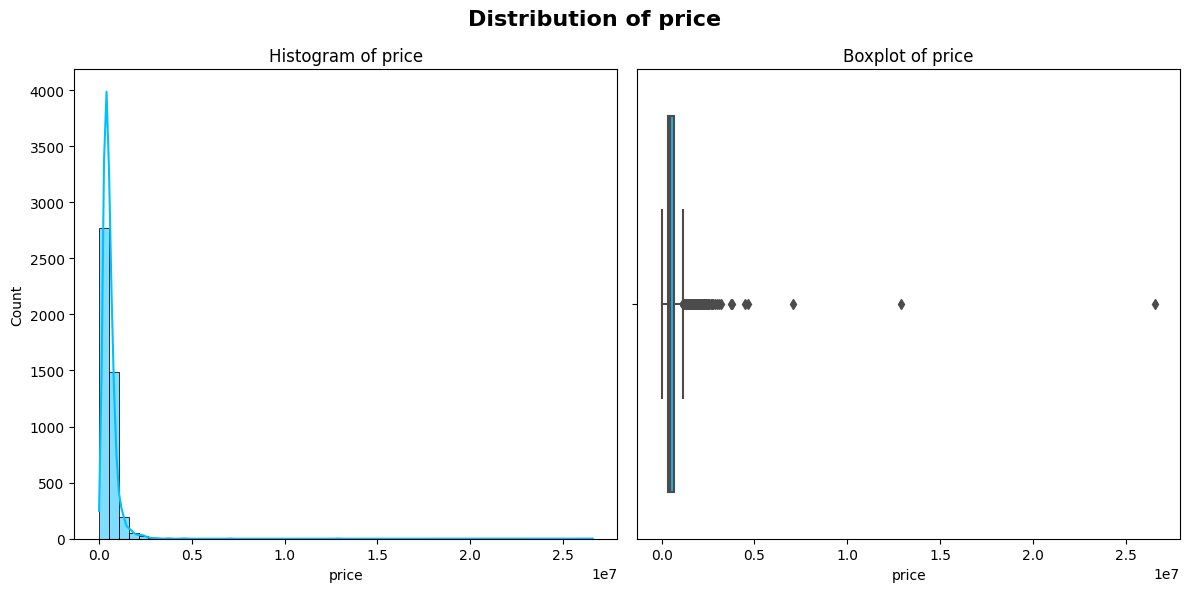

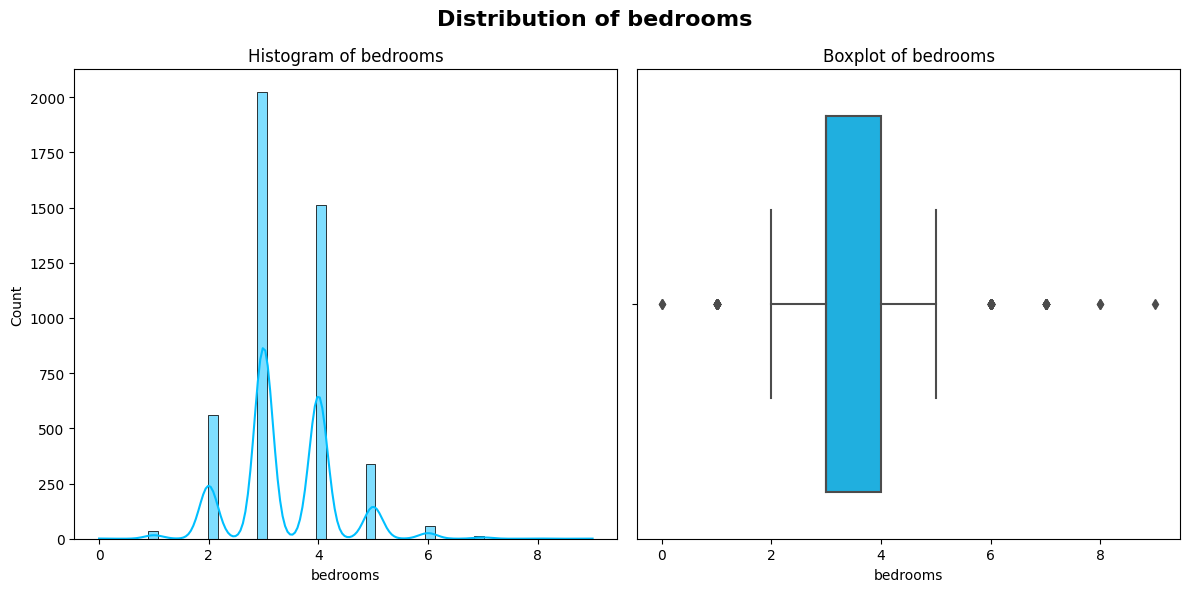

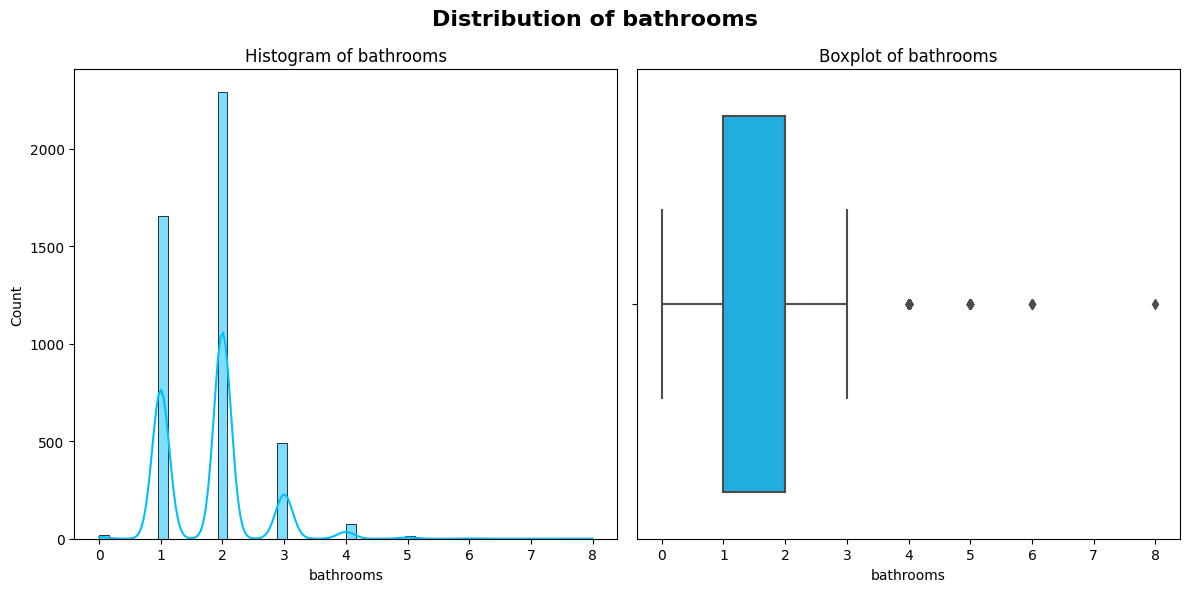

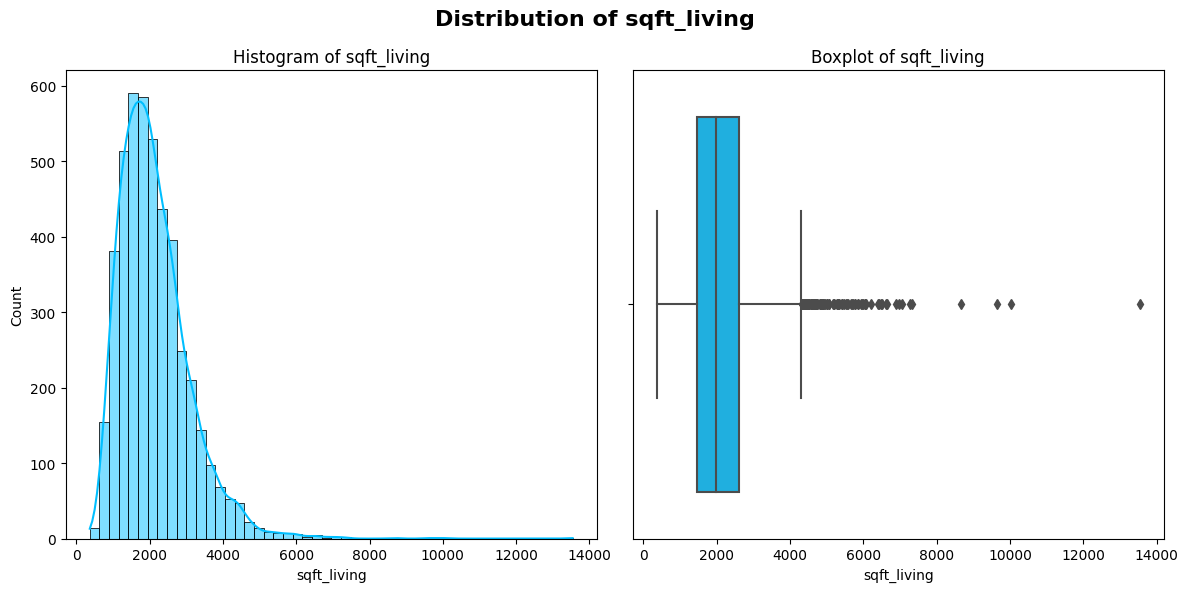

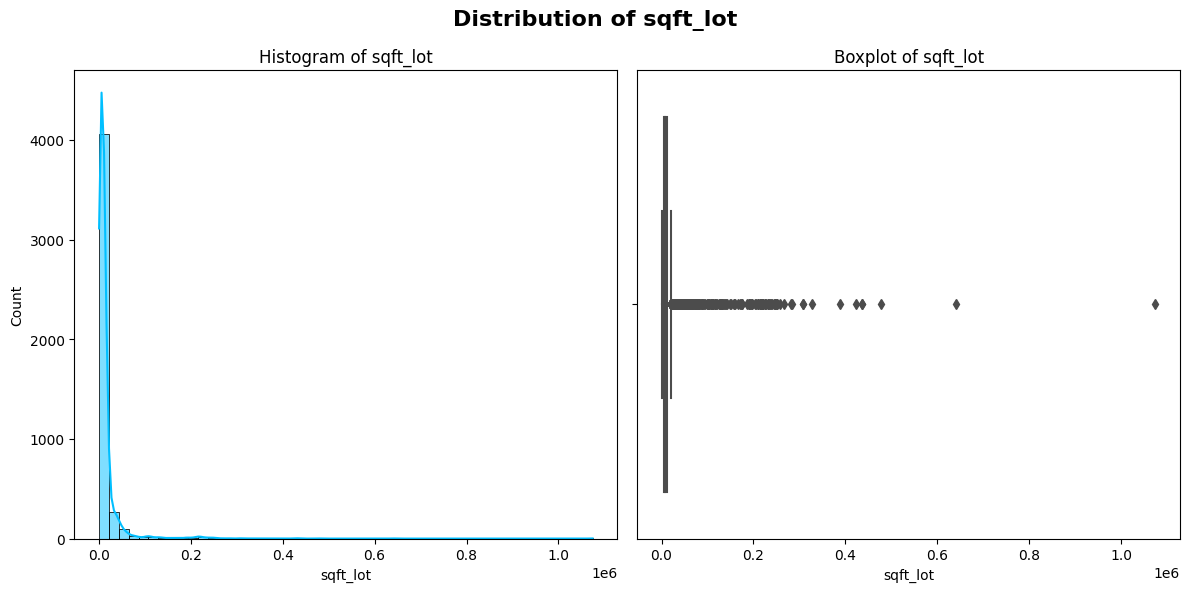

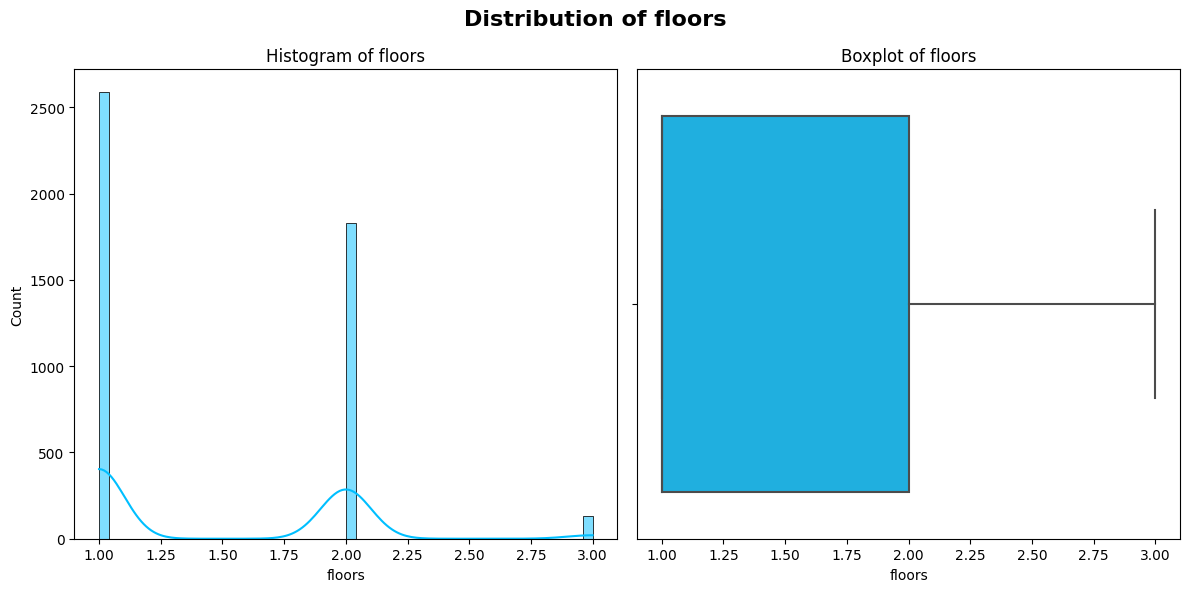

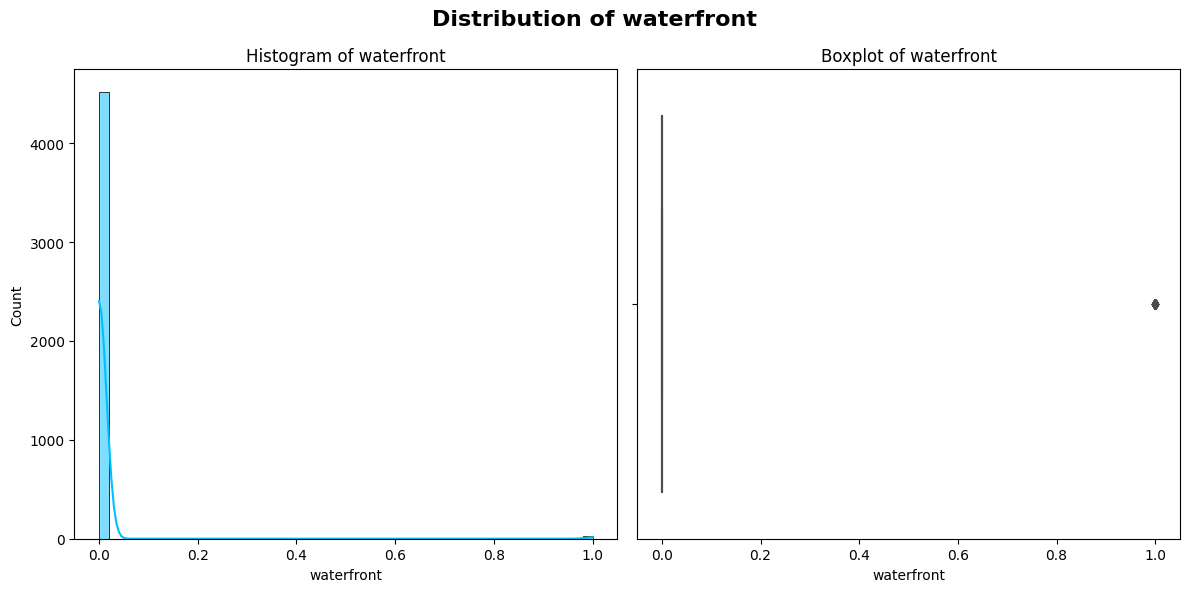

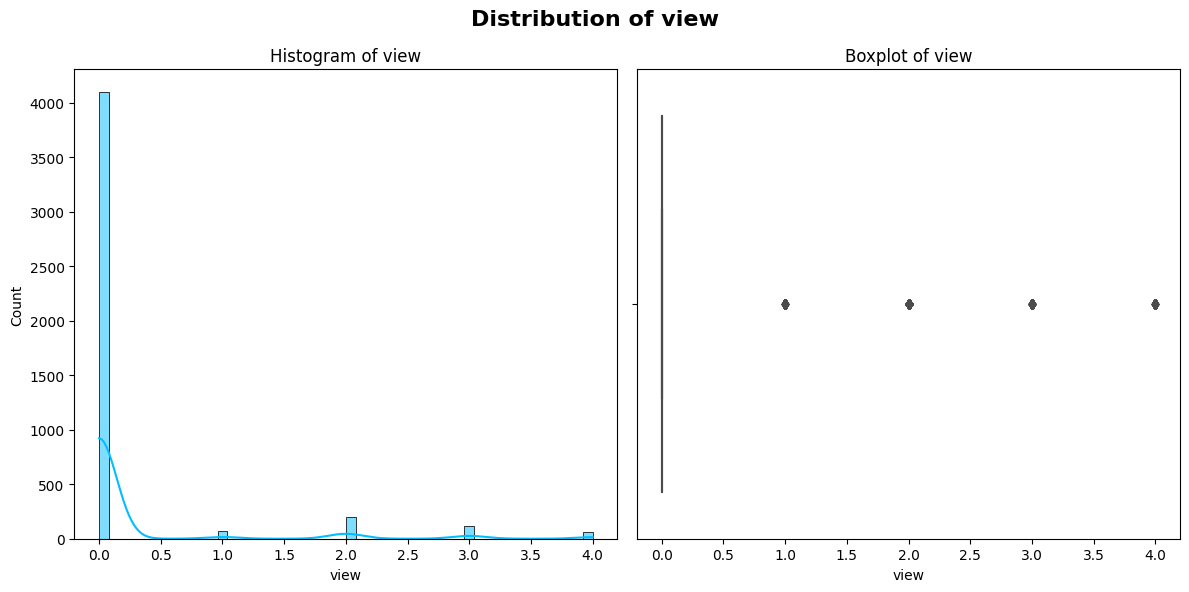

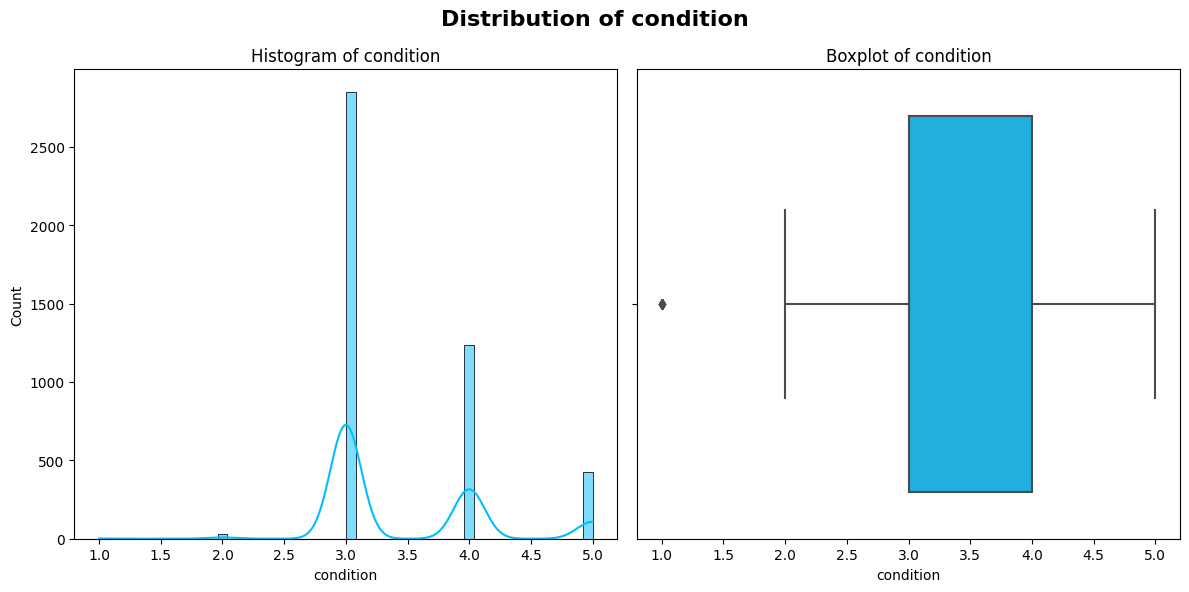

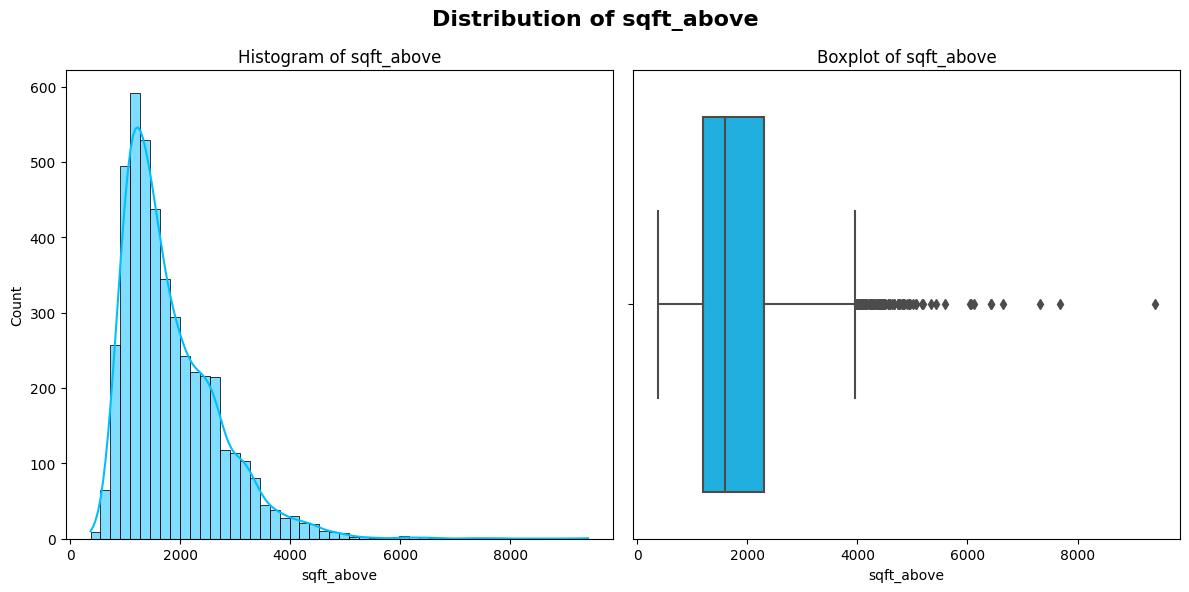

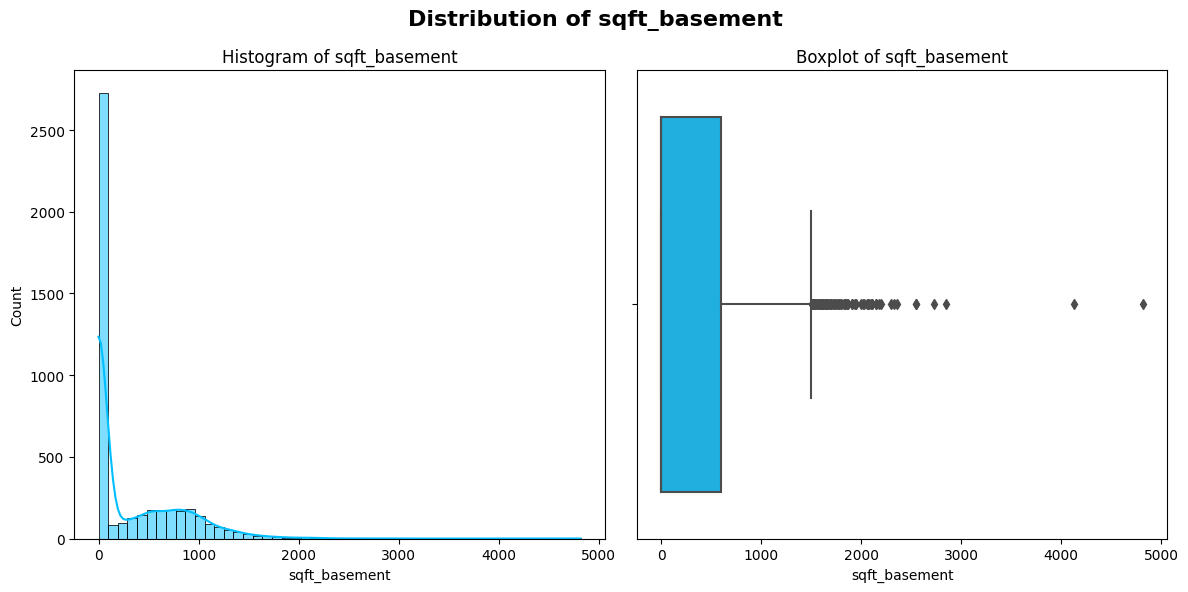

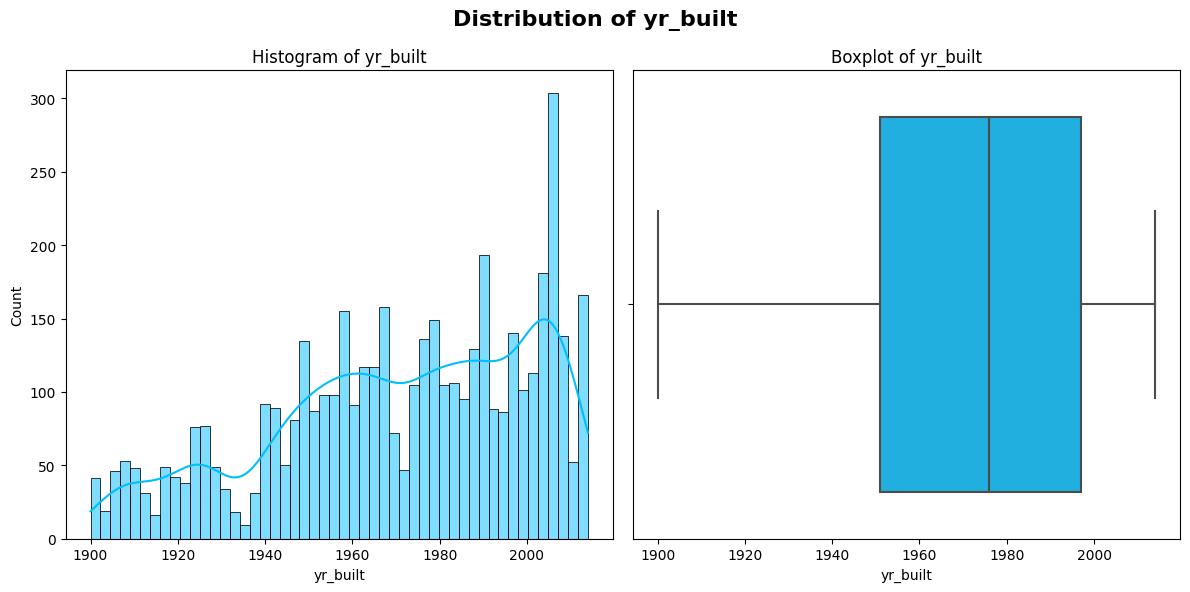

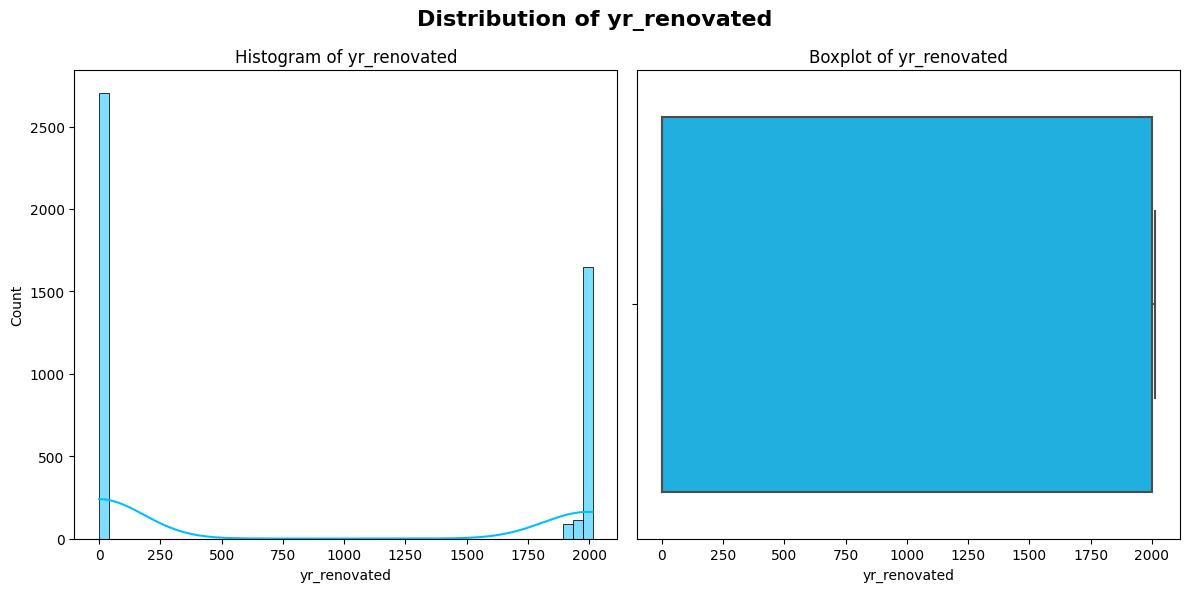

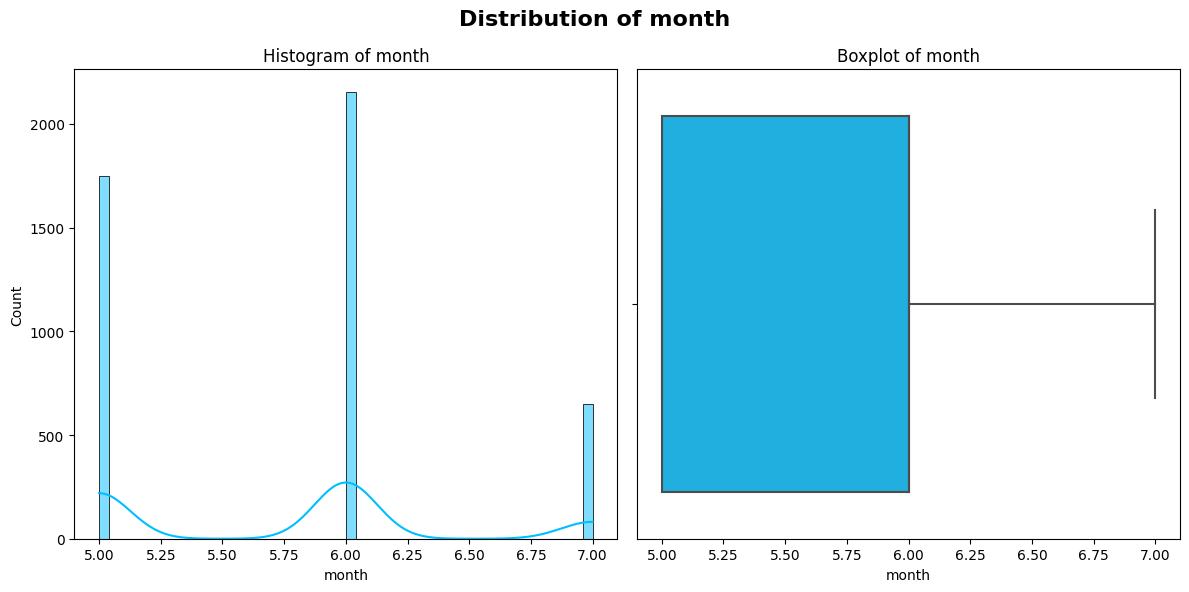

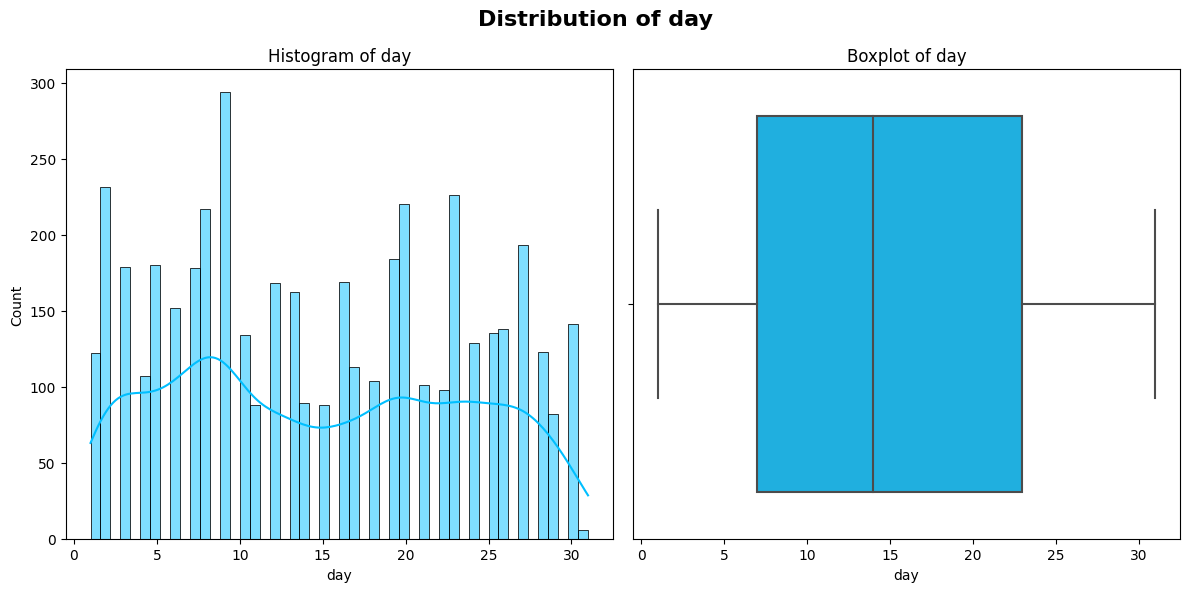

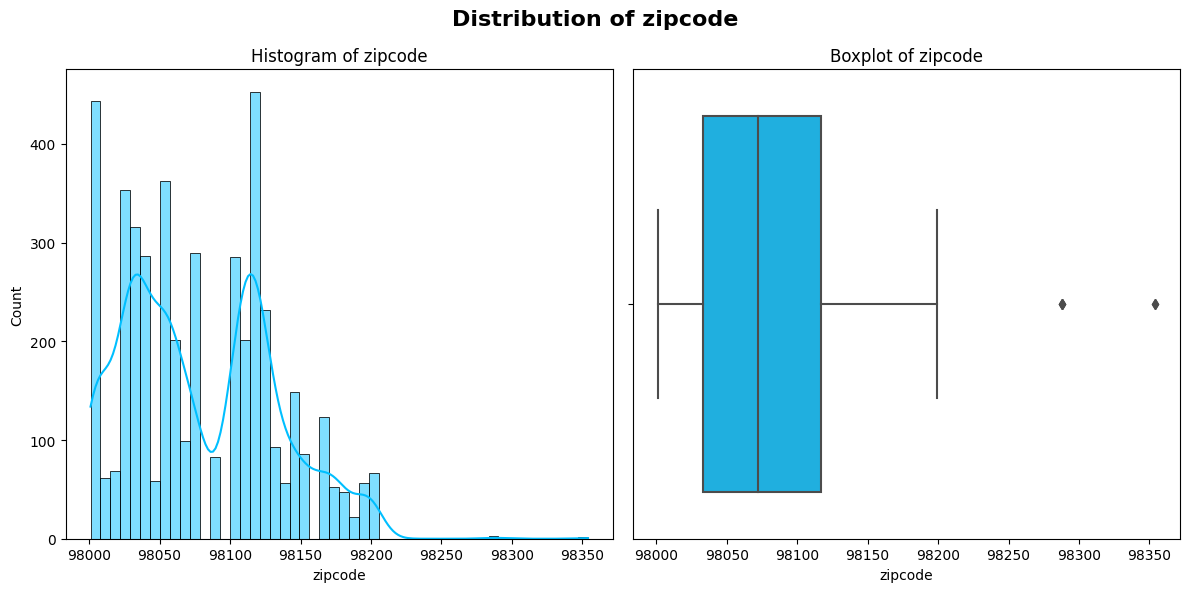

In [27]:
num_columns = df.select_dtypes(include=['number']).columns
for column in num_columns:
    num_plot(column)

In [28]:
Cat_columns = df.select_dtypes(include=['object', 'category']).columns

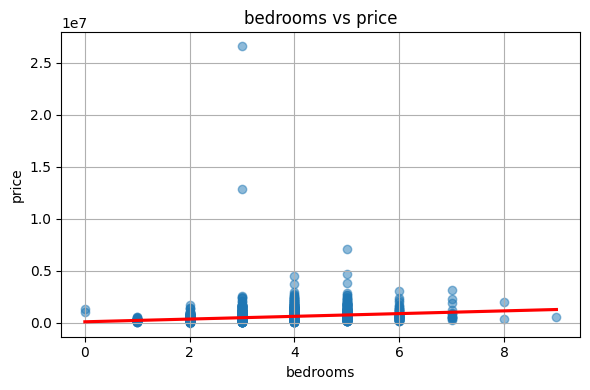

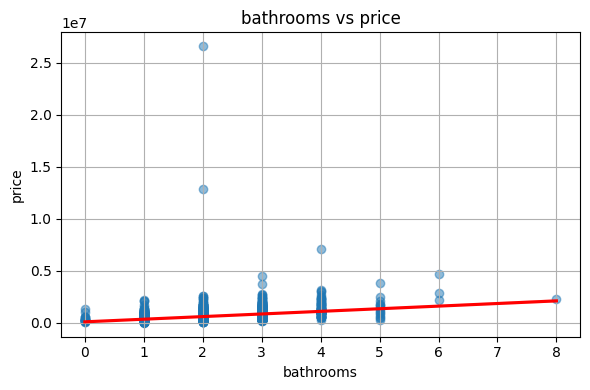

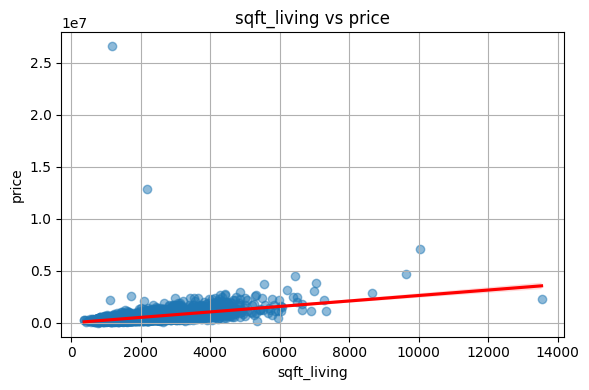

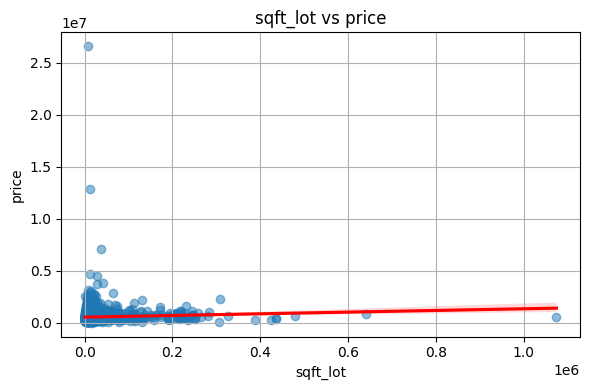

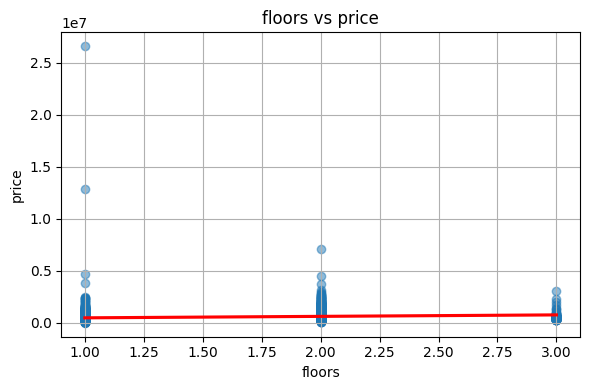

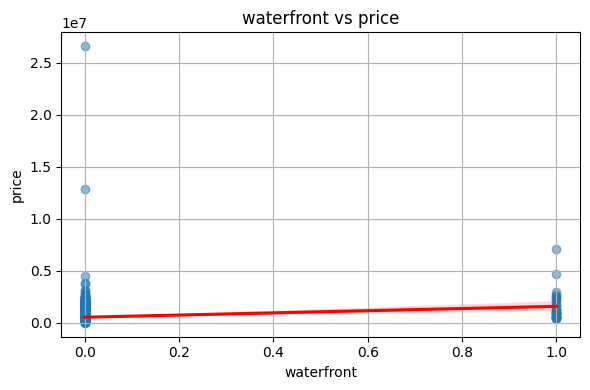

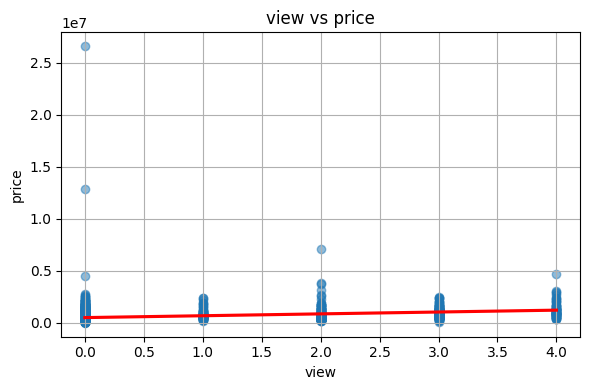

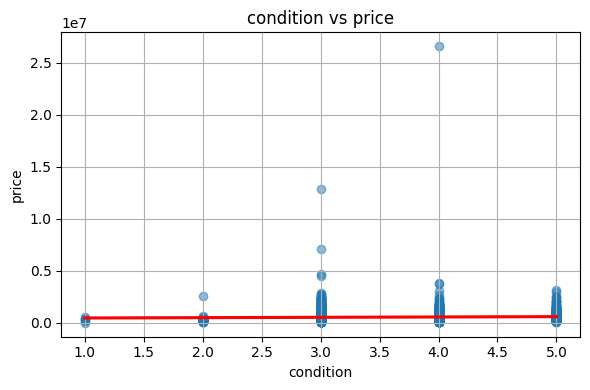

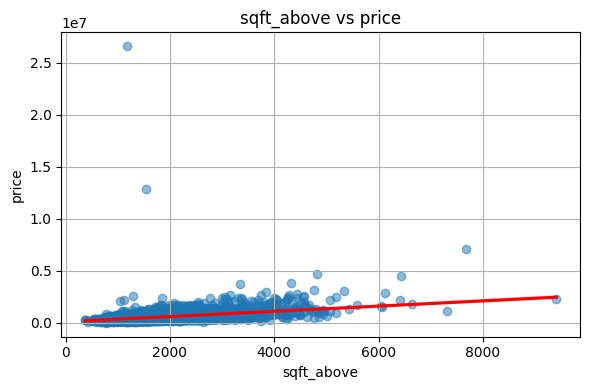

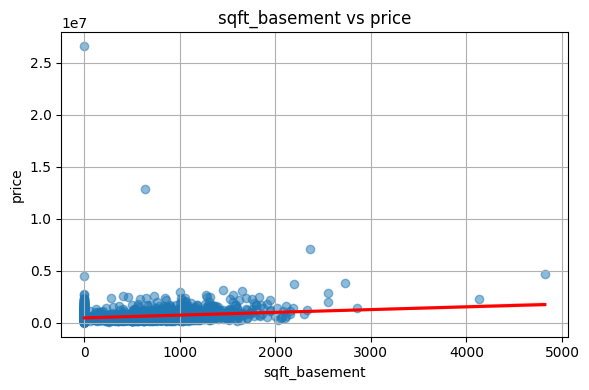

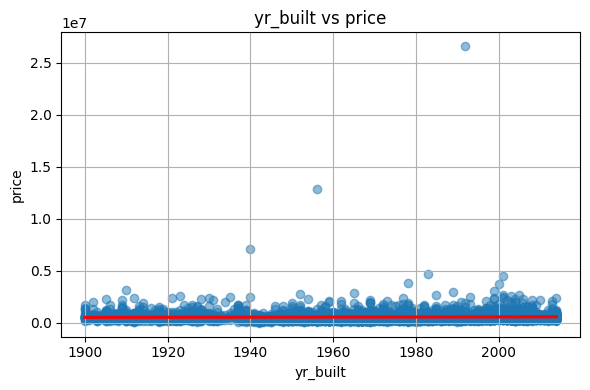

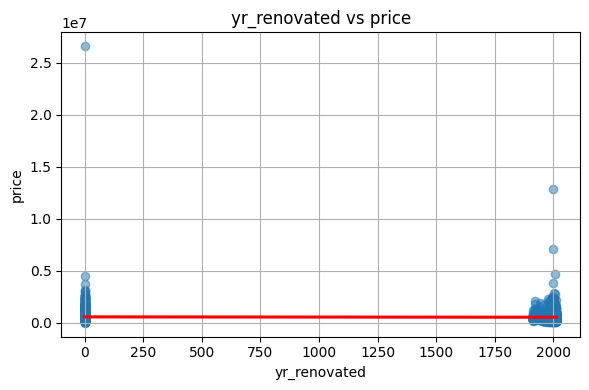

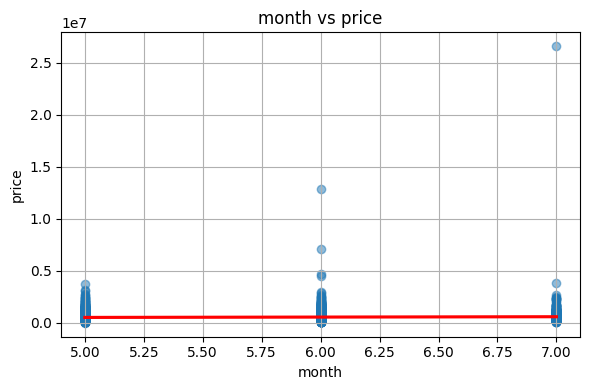

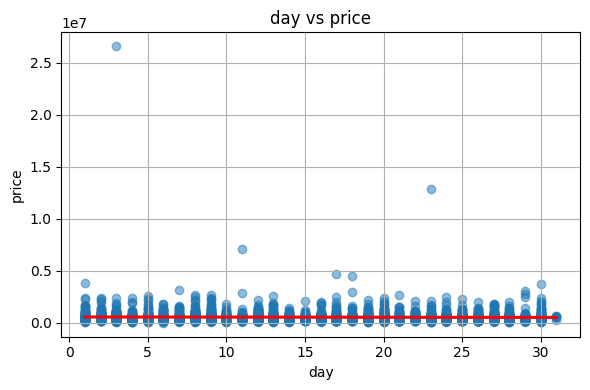

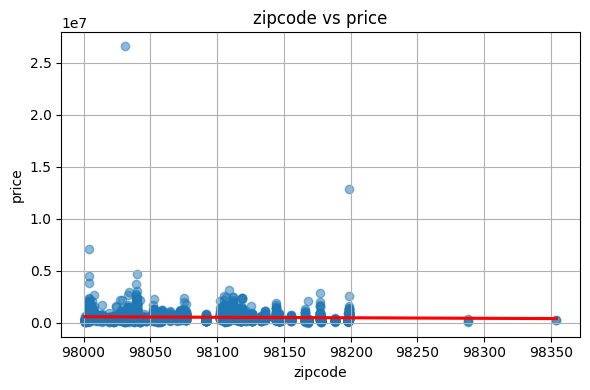

In [29]:
target_col = 'price'
numeric_features = df.select_dtypes(include='number').drop(columns=[target_col])

for feature in numeric_features.columns:
    plt.figure(figsize=(6, 4))
    sns.regplot(data=df, x=feature, y=target_col, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    plt.title(f"{feature} vs {target_col}")
    plt.xlabel(feature)
    plt.ylabel(target_col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


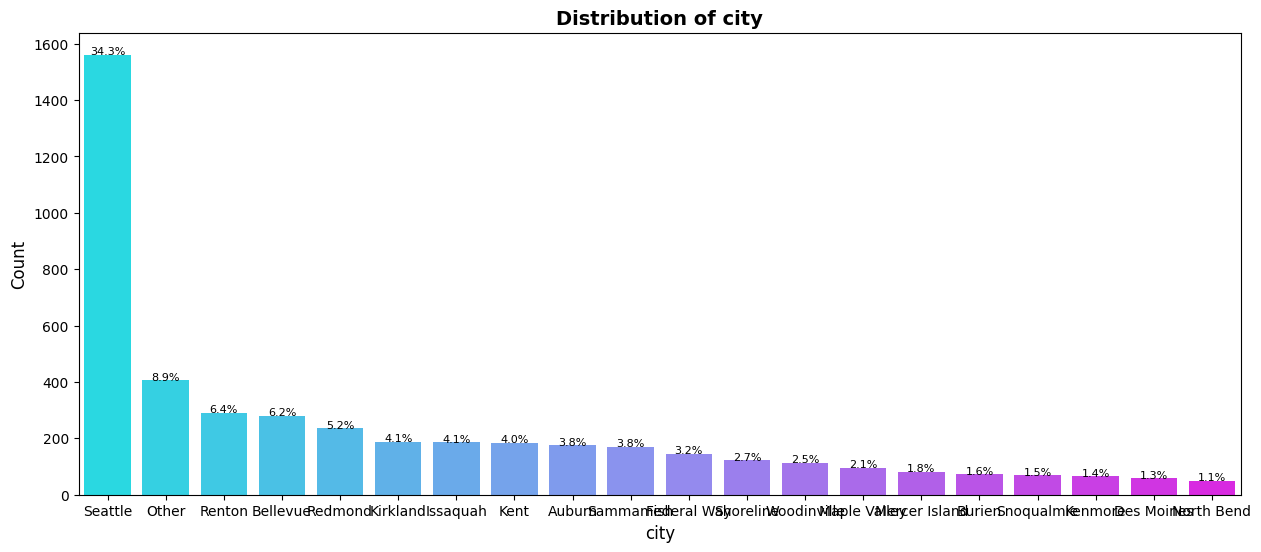

In [30]:
def cat_bar_plot(column, df):
    plt.figure(figsize=(15, 6))

    data_counts = df[column].value_counts()
    total = data_counts.sum()
    percentages = (data_counts / total) * 100
    ax = sns.barplot(x=data_counts.index, y=data_counts.values, palette="cool")
    for i, count in enumerate(data_counts.values):
        percentage = f"{percentages[i]:.1f}%"
        ax.text(i, count + 0.5, percentage, ha='center', fontsize=8,  color='black')

    plt.xlabel(column, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.title(f"Distribution of {column}", fontsize=14, fontweight='bold')

    plt.xticks(rotation=0)
    plt.show()
Cat_columns

for column in Cat_columns:
    cat_bar_plot(column,df)

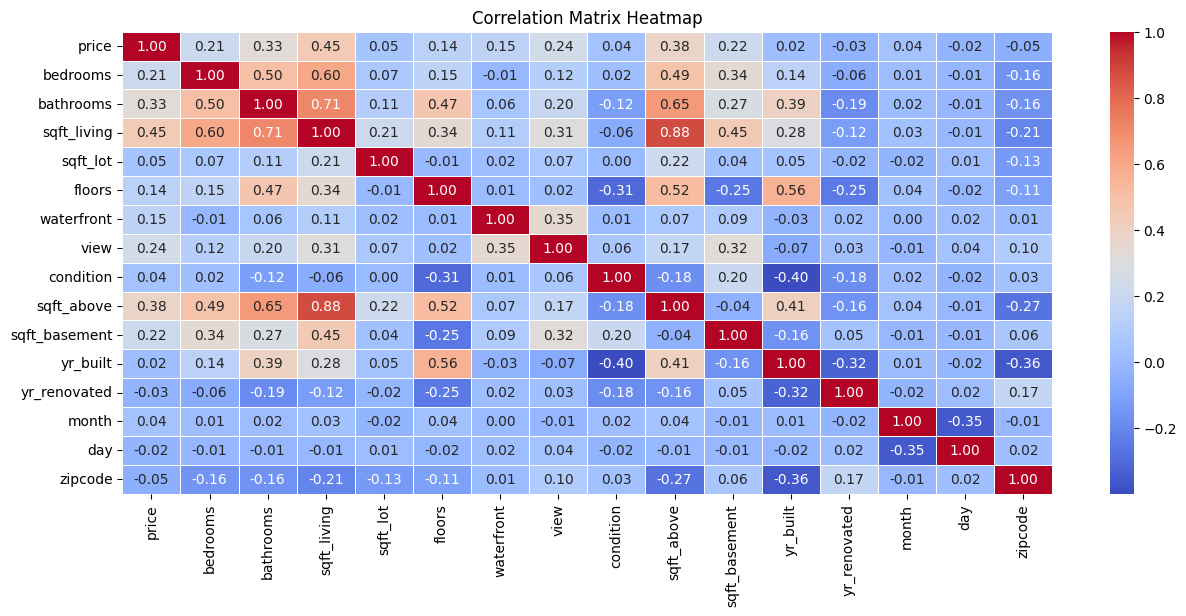

In [31]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(15, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


# **Data Preprocessing**

In [32]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42,shuffle=True)

train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

In [33]:
train_df.shape,test_df.shape

((3640, 17), (911, 17))

Handle outlier

In [34]:
numeric_cols = df.select_dtypes(include=np.number).columns

In [35]:
numeric_cols

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'month', 'day', 'zipcode'],
      dtype='object')

In [36]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df


In [37]:
num_columns = df.select_dtypes(include=['number']).columns

In [38]:
num_columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'month', 'day', 'zipcode'],
      dtype='object')

In [39]:
cols_to_process = [col for col in num_columns if col not in ['zipcode', 'waterfront', 'view', 'condition']]
train_df_cleaned = remove_outliers_iqr(train_df, cols_to_process)
test_df_cleaned = remove_outliers_iqr(test_df, cols_to_process)

In [40]:
train_df_cleaned.shape,test_df_cleaned.shape

((2833, 17), (717, 17))

In [41]:
# def clip_outliers_iqr(data):

#     clipped_data = data.copy()

#     for col in numeric_cols.difference(['view','waterfront','zipcode']):
#         Q1 = clipped_data[col].quantile(0.25)
#         Q3 = clipped_data[col].quantile(0.75)
#         IQR = Q3 - Q1
#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR
#         print(f"clo  {col},Lower bound: {lower_bound}, Upper bound: {upper_bound}")
#         clipped_data[col] = clipped_data[col].clip(lower=lower_bound, upper=upper_bound)

#     return clipped_data

In [42]:
# clipped_train = clip_outliers_iqr(X_train)


# # clipped_test = clip_outliers_iqr(X_test)

In [43]:
# def num_plot(column):
#   fig, ax = plt.subplots(1, 2, figsize = (12,6))
#   # ax = ax.flatten()
#   fig.suptitle(f"Distribution of {column}", fontsize=16, fontweight='bold')
#   sns.histplot(x=column, data=clipped_train, bins = 50,kde=True, edgecolor='black', ax=ax[0],color = 'deepskyblue')
#   ax[0].set_title(f"Histogram of {column}")
#   sns.boxplot(x=column, data=clipped_train, ax=ax[1],color = 'deepskyblue')
#   ax[1].set_title(f"Boxplot of {column}")
#   plt.tight_layout()
#   plt.show()

In [44]:
# num_columns = clipped_train.select_dtypes(include=['number']).columns
# for column in num_columns:
#     num_plot(column)

**Handle Categorical Variable**

In [45]:
X_train=train_df_cleaned.drop(columns=['price'])
y_train=train_df_cleaned['price']

X_test=test_df_cleaned.drop(columns=['price'])
y_test=test_df_cleaned['price']

In [46]:
city_train_dummies = pd.get_dummies(X_train['city'], prefix='city', dtype=int)
city_test_dummies = pd.get_dummies(X_test['city'], prefix='city', dtype=int)


city_train_dummies, city_test_dummies = city_train_dummies.align(city_test_dummies, join='left', axis=1, fill_value=0)

X_train_df= pd.concat([X_train.drop(columns='city'), city_train_dummies], axis=1)
X_test_df = pd.concat([X_test.drop(columns='city'), city_test_dummies], axis=1)


In [47]:
X_train_df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,month,day,zipcode,city_Auburn,city_Bellevue,city_Burien,city_Des Moines,city_Federal Way,city_Issaquah,city_Kenmore,city_Kent,city_Kirkland,city_Maple Valley,city_Mercer Island,city_North Bend,city_Other,city_Redmond,city_Renton,city_Sammamish,city_Seattle,city_Shoreline,city_Snoqualmie,city_Woodinville
0,4,1,1360,4840,1,0,0,4,1360,0,1928,0,7,8,98126,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,3,2,2210,8000,2,0,0,4,2210,0,1969,0,6,9,98023,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,1200,8514,1,0,0,3,1200,0,1959,1989,7,1,98022,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3,1,1760,10780,1,0,0,3,1760,0,1977,2004,6,9,98005,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,3,1,1290,1286,3,0,0,3,1290,0,2000,0,6,10,98103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


**Scaling**

In [48]:
def minmax_scale_split(X_train, X_test):

    X_train_scaled = X_train.copy()
    X_test_scaled = X_test.copy()

    numeric_cols = X_train.select_dtypes(include='number').columns

    scaler = MinMaxScaler()
    X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
    X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

    return X_train_scaled, X_test_scaled


In [49]:
X_train_scaled, X_test_scaled = minmax_scale_split(X_train_df, X_test_df)

In [50]:
X_test_scaled.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,month,day,zipcode,city_Auburn,city_Bellevue,city_Burien,city_Des Moines,city_Federal Way,city_Issaquah,city_Kenmore,city_Kent,city_Kirkland,city_Maple Valley,city_Mercer Island,city_North Bend,city_Other,city_Redmond,city_Renton,city_Sammamish,city_Seattle,city_Shoreline,city_Snoqualmie,city_Woodinville
1,0.000000,0.333333,0.422961,0.245542,0.0,0.0,0.0,0.75,0.193548,0.649635,0.201754,0.0,0.5,0.433333,0.405099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.666667,0.666667,0.649547,0.660551,0.5,0.0,0.0,0.50,0.781362,0.000000,0.798246,0.0,0.0,0.033333,0.028329,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.333333,0.333333,0.132931,0.451875,0.0,0.0,0.0,1.00,0.168459,0.000000,0.517544,0.0,1.0,0.066667,0.155807,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.666667,0.333333,0.519637,0.628487,0.0,0.0,0.0,0.75,0.505376,0.248175,0.675439,0.0,0.0,0.133333,0.144476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.333333,0.666667,0.419940,0.190444,0.5,0.0,0.0,0.75,0.508961,0.000000,0.903509,0.0,0.5,0.066667,0.181303,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


**Skwed**

In [51]:
def transform_skewed_features(X_train_scaled, X_test_scaled):

    X_train_trans = X_train_scaled.copy()
    X_test_trans = X_test_scaled.copy()

    numeric_cols = X_train_scaled.select_dtypes(include='number').columns

    transformer = PowerTransformer(method='yeo-johnson', standardize=False)

    X_train_trans[numeric_cols] = transformer.fit_transform(X_train_scaled[numeric_cols])
    X_test_trans[numeric_cols] = transformer.transform(X_test_scaled[numeric_cols])

    return X_train_trans, X_test_trans


In [52]:
X_train_trans, X_test_trans = transform_skewed_features(X_train_scaled, X_test_scaled)

# **feature selection**

In [53]:
X_train_trans.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'month', 'day', 'zipcode', 'city_Auburn',
       'city_Bellevue', 'city_Burien', 'city_Des Moines', 'city_Federal Way',
       'city_Issaquah', 'city_Kenmore', 'city_Kent', 'city_Kirkland',
       'city_Maple Valley', 'city_Mercer Island', 'city_North Bend',
       'city_Other', 'city_Redmond', 'city_Renton', 'city_Sammamish',
       'city_Seattle', 'city_Shoreline', 'city_Snoqualmie',
       'city_Woodinville'],
      dtype='object')

In [54]:
X = X_train_trans
y = y_train

X_numeric = X.select_dtypes(include='number')
mi_scores = mutual_info_regression(X_numeric, y,random_state=42)
mi_series = pd.Series(mi_scores, index=X_numeric.columns)
mi_series = mi_series.sort_values(ascending=False)

print("Mutual Information Scores")
print(mi_series)


Mutual Information Scores
zipcode               0.309994
sqft_living           0.214831
sqft_above            0.133901
yr_built              0.066175
bathrooms             0.061070
sqft_lot              0.055957
sqft_basement         0.033199
city_Seattle          0.032030
view                  0.031395
city_Federal Way      0.030899
floors                0.030345
city_Auburn           0.029580
city_Renton           0.028049
city_Kent             0.026688
city_Shoreline        0.023235
city_Mercer Island    0.021199
city_Maple Valley     0.020804
city_Sammamish        0.019328
city_North Bend       0.018185
yr_renovated          0.017325
city_Kirkland         0.016244
city_Other            0.015980
city_Redmond          0.015212
city_Issaquah         0.014181
condition             0.013752
city_Bellevue         0.012801
city_Des Moines       0.011551
bedrooms              0.009449
city_Snoqualmie       0.009006
waterfront            0.005406
month                 0.004227
city_Kenmore 

In [55]:
# plt.figure(figsize=(10, 6))
# mi_series.plot(kind='barh', color='skyblue')
# plt.title("Feature Importance 'Mutual Information with target'")
# plt.xlabel("Mutual Information Score")
# plt.gca().invert_yaxis()
# plt.show()

will drop feature have less than .01 Mutual Information Score

In [56]:
low_mi_features = ['bedrooms', 'city_Snoqualmie', 'waterfront', 'month', 'city_Kenmore', 'day', 'city_Burien', 'city_Woodinville']
X_train_filtered = X_train_trans.drop(columns=low_mi_features, errors='ignore')
X_test_filtered = X_test_trans.drop(columns=low_mi_features, errors='ignore')


**VIF**

In [57]:
def calculate_vif(df, thresh=10.0):
    df = df.copy()
    dropped = True

    while dropped:
        dropped = False
        vif = pd.Series(
            [variance_inflation_factor(df.values, i) for i in range(df.shape[1])],
            index=df.columns
        )
        max_vif = vif.max()
        if max_vif > thresh:
            drop_feature = vif.idxmax()
            print(f"Dropping '{drop_feature}' with VIF: {max_vif:.2f}")
            df = df.drop(columns=drop_feature)
            dropped = True
    return df


In [58]:
X_train_vif = calculate_vif(X_train_filtered, thresh=10.0)
final_features = X_train_vif.columns.tolist()

X_train_final = X_train_filtered[final_features]
X_test_final = X_test_filtered[final_features]


Dropping 'sqft_above' with VIF: 179.25
Dropping 'condition' with VIF: 39.33
Dropping 'bathrooms' with VIF: 23.64
Dropping 'sqft_living' with VIF: 14.04
Dropping 'zipcode' with VIF: 12.27


In [59]:
X_test_final.shape

(717, 22)

**PCA**

In [60]:
pca = PCA(n_components=0.99)
X_train_pca = pca.fit_transform(X_train_final)
X_test_pca = pca.transform(X_test_final)

print(f"Number of PCA components chosen: {pca.n_components_}")


Number of PCA components chosen: 6


# **Model**

In [61]:

y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)


In [62]:
models = {
    'Linear Regression': LinearRegression(),
    "random forest": RandomForestRegressor(),
    "XGBoost": XGBRegressor(),
    "Extra Trees": ExtraTreesRegressor(),
}


param_grids = {
    'Linear Regression': {
        'fit_intercept': [True, False], 
    },
    'random forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': [1.0, 'sqrt', 'log2']  
    },
    'XGBoost': {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7, 10],
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0]
    },
    'Extra Trees': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': [1.0, 'sqrt', 'log2']  
    }
}


In [63]:
def adjusted_r2(r2, n, p):
    return 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

def evaluate_models_with_gridsearch(models, param_grids, X_train, y_train, X_test, y_test):
    best_models = {}

    n = X_test.shape[0]
    p = X_test.shape[1]

    for name in models:
        print(f"\n Running GridSearchCV for {name}...")
        grid = GridSearchCV(models[name], param_grids[name], cv=5, scoring='r2', n_jobs=-1, verbose=0)
        grid.fit(X_train, y_train)

        best_model = grid.best_estimator_
        preds = best_model.predict(X_test)

        r2 = r2_score(y_test, preds)
        adj_r2 = adjusted_r2(r2, n, p)
        mse = mean_squared_error(y_test, preds)
        mae = mean_absolute_error(y_test, preds)

        print(f" {name}")
        print(f"   R²:           {r2:.4f}")
        print(f"   Adjusted R²:  {adj_r2:.4f}")
        print(f"   MSE:          {mse:.4f}")
        print(f"   MAE:          {mae:.4f}")
        print(f"   Best Params:  {grid.best_params_}")

        best_models[name] = {
            "model": best_model,
            "r2_score": r2,
            "adjusted_r2": adj_r2,
            "mse": mse,
            "mae": mae,
            "best_params": grid.best_params_
        }

    return best_models




In [64]:
best_models = evaluate_models_with_gridsearch(
    models, param_grids,
    X_train_filtered, y_train_log,
    X_test_filtered, y_test_log
)



 Running GridSearchCV for Linear Regression...
 Linear Regression
   R²:           0.6678
   Adjusted R²:  0.6548
   MSE:          0.0672
   MAE:          0.1840
   Best Params:  {'fit_intercept': True}

 Running GridSearchCV for random forest...
 random forest
   R²:           0.7269
   Adjusted R²:  0.7162
   MSE:          0.0552
   MAE:          0.1631
   Best Params:  {'max_depth': 20, 'max_features': 1.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

 Running GridSearchCV for XGBoost...
 XGBoost
   R²:           0.7584
   Adjusted R²:  0.7490
   MSE:          0.0489
   MAE:          0.1463
   Best Params:  {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300, 'subsample': 1.0}

 Running GridSearchCV for Extra Trees...
 Extra Trees
   R²:           0.7319
   Adjusted R²:  0.7214
   MSE:          0.0542
   MAE:          0.1597
   Best Params:  {'max_depth': 30, 'max_features': 1.0, 'min_samples_leaf': 1, 'min_samples_split': 10,

In [65]:
import joblib
for name, info in best_models.items():
    joblib.dump(info["model"], f"best_{name.lower().replace(' ', '_')}_model.pkl")